### Filtragem inicial dos dados sobre Leishmaniose Visceral

#### Toda nossa análise foi feita acerca dos anos de 2007 até 2019 que foram os dados disponíveis publicamente até então

### Integrantes:
Carolina Muller Ferreira : RA = 210904 <br>
Letícia Moreno : RA = 235497 <br>
Lucas Feliciano da Silva : RA = 182487 <br>
Paulo Victor : RA = 224943 <br>


##### Fonte: LEISHMANIOSE VISCERAL - Casos confirmados Notificados no Sistema de Informação de Agravos de Notificação - Brasil - ( 2007~2019)

###### http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/leishvbr.def

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set_theme()

df = pd.read_csv("LEIV_total_07_19.csv", usecols=['DT_NOTIFIC','SG_UF','CS_SEXO','NU_IDADE_N','FEBRE','FRAQUEZA','EDEMA','EMAGRA',
                                         'TOSSE','PALIDEZ','BACO','INFECCIOSO','FEN_HEMORR',
                                         'FIGADO','ICTERICIA','EVOLUCAO'])#'PESO',

### É necessário fazer uma filtragem das colunas que vão ser necessárias nesta análise e excluindo dados não definidos

In [2]:
UF = {52:'GO',31:'MG',15:'PA',23:'CE',29:'BA',41:'PR',42:'SC',26:'PE',17:'TO',21:'MA',24:'RN',22:'PI',43:'RS',51:'MT',
     12:'AC',35:'SP',32:'ES',25:'PB',28:'SE',27:'AL',13:'AM',50:'MS',14:'RR',16:'AP',11:'RO',33:'RJ',53:'DF'}

#UF = {52:'Goias',31:'Minas Gerais',15:'Para',23:'Ceara',29:'Bahia',41:'Parana',42:'Santa Catarina',26:'Pernambuco',
#      17:'Tocantins',21:'Maranhao',24:'Rio Grande do Norte',22:'Piaui',43:'Rio Grande do Sul',51:'Mato Grosso',
#     12:'Acre',35:'Sao Paulo',32:'Espirito Santo',25:'Paraiba',28:'Sergipe',27:'Alagoas',13:'Amazonas',
#      50:'Mato Grosso do Sul',14:'Roraima',16:'Amapa',11:'Rondonia',33:'Rio de Janeiro',53:'Distrito Federal'}

df = df.replace({'SG_UF':UF})#alterando os valores dos indices de cada UF para suas respectivas siglas

df['DT_NOTIFIC'] = df['DT_NOTIFIC'].astype(str).str[:4]#Pegando só o ano de notificação do caso de Leishmaniose
#df['DT_NOTIFIC'] = df['DT_NOTIFIC'].astype(str).str[:10]

df = df[(df.CS_SEXO == 'M') | (df.CS_SEXO == 'F')]#removendo os dados onde o sexo não estava definido

#removendo todos os valores que não representem diretamente uma idade maior que 1
df = df[df['NU_IDADE_N'].astype(str).str.startswith('4')]
df['NU_IDADE_N'] = df['NU_IDADE_N'].astype(str).str[1:]
df['NU_IDADE_N']= pd.to_numeric(df['NU_IDADE_N'])

df = df[(df.FEBRE == 1.0) | (df.FEBRE == 2.0)]#removendo os valores onde foi ignorado o fator febre

df = df[(df.FRAQUEZA == 1.0) | (df.FRAQUEZA == 2.0)]#removendo os valores onde foi ignorado o fator fraqueza

df = df[(df.EDEMA == 1.0) | (df.EDEMA == 2.0)]#removendo os valores onde foi ignorado o fator edema

df = df[(df.EMAGRA == 1.0) | (df.EMAGRA == 2.0)]#removendo os valores onde foi ignorado o fator enfraquecimento

df = df[(df.TOSSE == 1.0) | (df.TOSSE == 2.0)]#removendo os valores onde foi ignorado o fator tosse

df = df[(df.PALIDEZ == 1.0) | (df.PALIDEZ == 2.0)]#removendo os valores onde foi ignorado o fator palidez

df = df[(df.BACO == 1.0) | (df.BACO == 2.0)]#removendo os valores onde foi ignorado o fator baço inchado

df = df[(df.INFECCIOSO == 1.0) | (df.INFECCIOSO == 2.0)]#removendo os valores onde foi ignorado o fator INFECCIOSO

df = df[(df.FEN_HEMORR == 1.0) | (df.FEN_HEMORR == 2.0)]#removendo os valores onde foi ignorado o fator hemorragia

df = df[(df.FIGADO == 1.0) | (df.FIGADO == 2.0)]#removendo os valores onde foi ignorado o fator inchaço no fígado

df = df[(df.ICTERICIA == 1.0) | (df.ICTERICIA == 2.0)]#removendo os valores onde foi ignorado o fator ictericia

#removendo casos onde houveram transferencia de pacientes
df = df[(df.EVOLUCAO == 1.0) | (df.EVOLUCAO == 2.0) | (df.EVOLUCAO == 3.0) | (df.EVOLUCAO == 4.0)]
#1 = curado , 2 = abandonou tratamento , 3 = óbito por leishmaniose, 4 = óbito por outras causas

#df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'])

## Ocorrência de casos registrados de leishmaniose ao longo dos anos de 2007~2019

C:\Users\the_p\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\the_p\Anaconda3\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


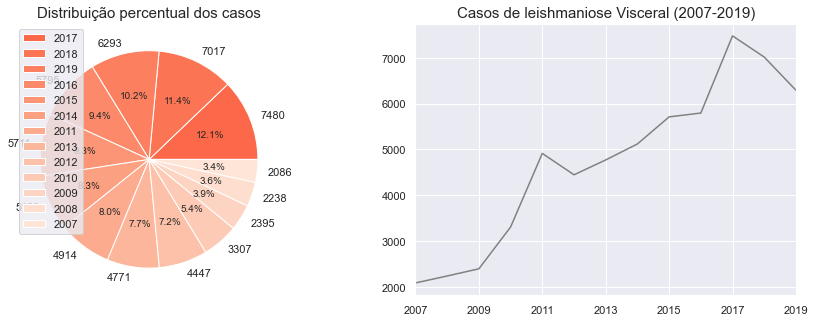

2017    7480
2018    7017
2019    6293
2016    5795
2015    5711
2014    5120
2011    4914
2013    4771
2012    4447
2010    3307
2009    2395
2008    2238
2007    2086
Name: DT_NOTIFIC, dtype: int64


In [3]:
df['DT_NOTIFIC'].value_counts().index
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))

#colors = ['#383838','#686868','#989898','#D0D0D0','#DCDCDC']
colors = plt.cm.Reds(np.linspace(0.5, 0.1, len(df['DT_NOTIFIC'].unique())))

#gráfico de pizza dos casos nestes 5 anos
plt.title('Casos de leishmaniose Visceral (2007-2019)',fontsize=15)
ax1.set_title('Distribuição percentual dos casos',fontsize=15)
ax1.pie(df['DT_NOTIFIC'].value_counts(),labels=df['DT_NOTIFIC'].value_counts(),autopct='%1.1f%%',colors=colors)
ax1.legend(df['DT_NOTIFIC'].value_counts().index)


#série temporal
years=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
df['DT_NOTIFIC'].value_counts().loc[years].plot(color='gray')

plt.show()
print(df['DT_NOTIFIC'].value_counts())

In [4]:
'''df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'])

time_series = pd.DataFrame(df['DT_NOTIFIC'].value_counts().reset_index())
time_series.columns = ['date', 'count']

time_series = time_series.sort_values('date', ascending=True)'''

"df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'])\n\ntime_series = pd.DataFrame(df['DT_NOTIFIC'].value_counts().reset_index())\ntime_series.columns = ['date', 'count']\n\ntime_series = time_series.sort_values('date', ascending=True)"

## Matriz de correlação destas variáveis relacionadas a leishmaniose

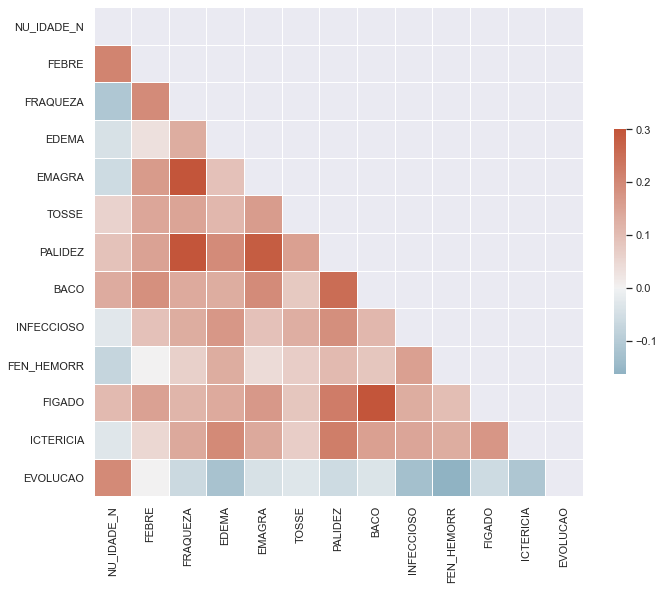

In [5]:

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Ocorrência de sintomas nos casos de leishamniose visceral

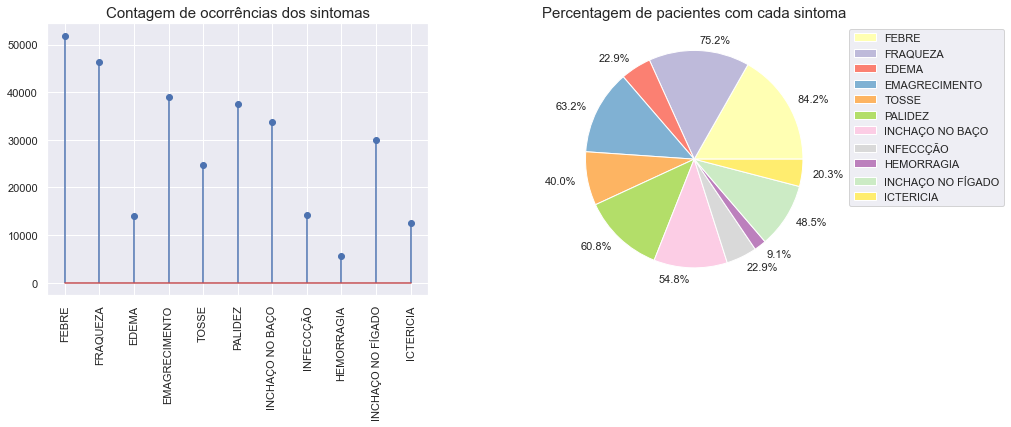

In [6]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))
labels = ['FEBRE','FRAQUEZA','EDEMA','EMAGRECIMENTO','TOSSE','PALIDEZ','INCHAÇO NO BAÇO','INFECCÇÃO','HEMORRAGIA',
          'INCHAÇO NO FÍGADO','ICTERICIA']
sintomas = []
sintomas.append( df.loc[df['FEBRE'] == 1.0 , 'FEBRE'].count() )
sintomas.append( df.loc[df['FRAQUEZA'] == 1.0 , 'FRAQUEZA'].count() )
sintomas.append( df.loc[df['EDEMA'] == 1.0 , 'EDEMA'].count() )
sintomas.append( df.loc[df['EMAGRA'] == 1.0 , 'EMAGRA'].count() )
sintomas.append( df.loc[df['TOSSE'] == 1.0 , 'TOSSE'].count() )
sintomas.append( df.loc[df['PALIDEZ'] == 1.0 , 'PALIDEZ'].count() )
sintomas.append( df.loc[df['BACO'] == 1.0 , 'BACO'].count() )
sintomas.append( df.loc[df['INFECCIOSO'] == 1.0 , 'INFECCIOSO'].count() )
sintomas.append( df.loc[df['FEN_HEMORR'] == 1.0 , 'FEN_HEMORR'].count() )
sintomas.append( df.loc[df['FIGADO'] == 1.0 , 'FIGADO'].count() )
sintomas.append( df.loc[df['ICTERICIA'] == 1.0 , 'ICTERICIA'].count() )

#plt.xticks(rotation=90)
ax1.tick_params(axis='x', labelrotation = 90)

ax1.set_title('Contagem de ocorrências dos sintomas',fontsize=15)
ax1.stem(labels,sintomas,use_line_collection=True)


freq = [i/df.shape[0] for i in sintomas] # frequencia de cada sintoma no dataset
freq = [i * 100 for i in freq]
freq = ["%.1f" % i for i in freq]

perc = [i + "%" for i in freq]
colors = plt.cm.Set3(np.linspace(0.1, 1, len(sintomas)))
plt.title("Percentagem de pacientes com cada sintoma",fontsize=15)
plt.pie(freq,labels=perc,colors=colors)
plt.legend(labels, bbox_to_anchor=(1.05,1))

plt.show()

## Situação final dos afetados por Leishmaniose nos anos em questão

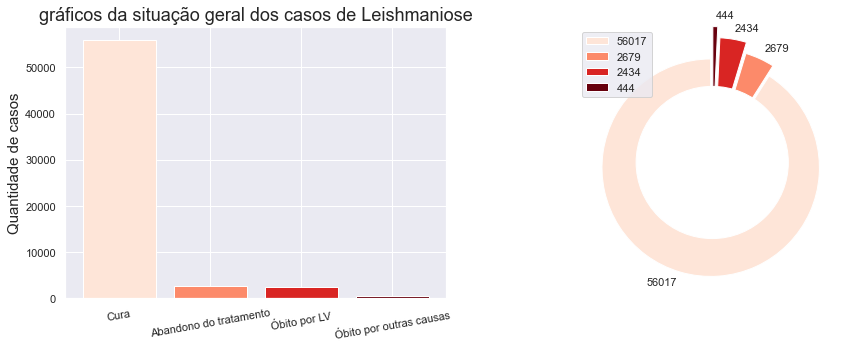

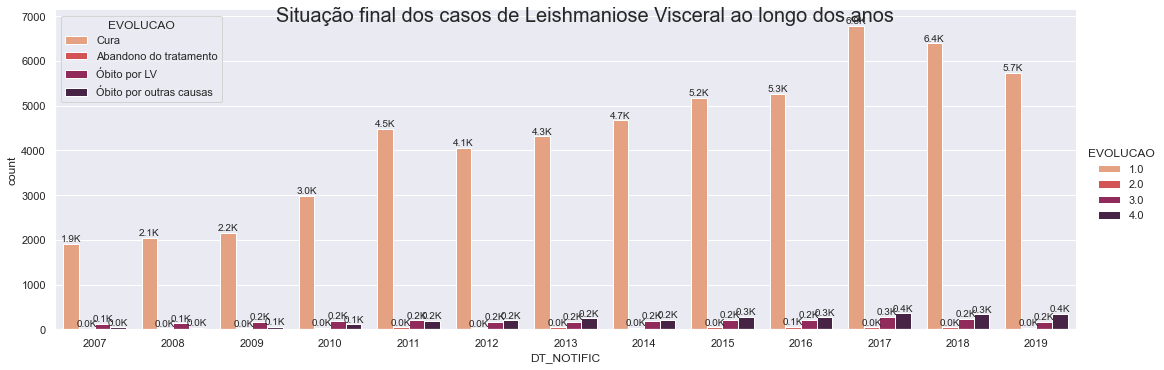

'\nfor year in years:\n    print( "Ano:" +str(2007+i) + ", Quantidade:")\n    i+=1\n    print( year[\'EVOLUCAO\'].value_counts())\n'

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
status = ['Cura','Abandono do tratamento','Óbito por LV','Óbito por outras causas']

##bar plot

colors = colors = plt.cm.Reds(np.linspace(0.1, 1, len(df['EVOLUCAO'].unique())))
ax1.set_title('gráficos da situação geral dos casos de Leishmaniose',fontsize=18)


ax1.bar(status,df['EVOLUCAO'].value_counts(),color=colors) #plotando status dos pacientes de ao longo destes anos
years = []
for year in df['DT_NOTIFIC'].unique():
    years.append(df.loc[df['DT_NOTIFIC'] == year])


ax1.tick_params(axis='x', labelrotation = 10)
ax1.set_ylabel('Quantidade de casos',fontsize=15)

##donut plot
explode = (0.05,0.05,0.15,0.25)

ax2.pie(df['EVOLUCAO'].value_counts(), colors = colors, labels=df['EVOLUCAO'].value_counts(), startangle=90, pctdistance=0.85, explode = explode)#draw circle
ax2.legend(df['EVOLUCAO'].value_counts())

#setando o circulo central do donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# donut
plt.show()

#print( (df['EVOLUCAO'].value_counts()/df['EVOLUCAO'].count())* 100)
#print( df['EVOLUCAO'].value_counts() )


#seaborn plot
g = sns.catplot(x='DT_NOTIFIC',kind='count',data=df,hue='EVOLUCAO',height=5,aspect=3,palette='rocket_r')

g.fig.suptitle(
    "Situação final dos casos de Leishmaniose Visceral ao longo dos anos",fontsize=20)
plt.legend(title="EVOLUCAO",labels=status)

ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


plt.show()

i =0
'''
for year in years:
    print( "Ano:" +str(2007+i) + ", Quantidade:")
    i+=1
    print( year['EVOLUCAO'].value_counts())
'''
#print dos dados pra carol das situacoes por ano

## Mortalidade nos casos de leishmaniose

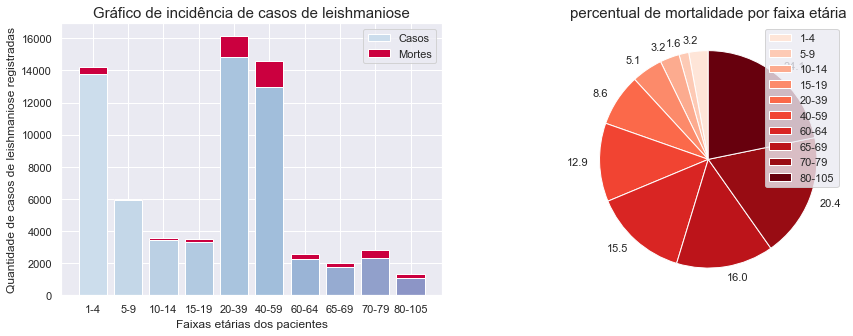

['3.2', '1.6', '3.2', '5.1', '8.6', '12.9', '15.5', '16.0', '20.4', '24.1']


In [8]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

ages=['1-4','5-9','10-14','15-19','20-39','40-59','60-64','65-69','70-79','80-105']

plt.title('percentual de mortalidade por faixa etária',fontsize=15)

#pegando a quantidade de casos cujas idades estejam na faixa etária especificada
btwn1 = df['NU_IDADE_N'].between(1,4,inclusive=True).value_counts()[1] #faixa entre 1~4 anos
btwn2 = df['NU_IDADE_N'].between(5,9,inclusive=True).value_counts()[1] #faixa entre 5~9 anos
btwn3 = df['NU_IDADE_N'].between(10,14,inclusive=True).value_counts()[1] #faixa entre 10~14 anos
btwn4 = df['NU_IDADE_N'].between(15,19,inclusive=True).value_counts()[1] #faixa entre 15~19 anos
btwn5 = df['NU_IDADE_N'].between(20,39,inclusive=True).value_counts()[1] #faixa entre 20~39 anos
btwn6 = df['NU_IDADE_N'].between(40,59,inclusive=True).value_counts()[1] #faixa entre 40~59 anos
btwn7 = df['NU_IDADE_N'].between(60,64,inclusive=True).value_counts()[1] #faixa entre 60~64 anos
btwn8 = df['NU_IDADE_N'].between(65,69,inclusive=True).value_counts()[1] #faixa entre 65~69 anos
btwn9 = df['NU_IDADE_N'].between(70,79,inclusive=True).value_counts()[1] #faixa entre 70~79 anos
btwn10 = df['NU_IDADE_N'].between(80,df['NU_IDADE_N'].max(),inclusive=True).value_counts()[1] #faixa entre 80~105 anos

cases=[btwn1,btwn2,btwn3,btwn4,btwn5,btwn6,btwn7,btwn8,btwn9,btwn10] #quantidade de casos por faixa etária

def get_mortality(df,init,end): #pegando a quantidade de óbitos por faixa etária(linhas=shape[0])
    df = df[df['NU_IDADE_N'].between(init,end,inclusive=True)]
    return df[ (df['EVOLUCAO'] == 3.0) | (df['EVOLUCAO'] == 4.0)].shape[0]

btwn1 = get_mortality(df,1,4)
btwn2 = get_mortality(df,5,9)
btwn3 = get_mortality(df,10,14)
btwn4 = get_mortality(df,15,19)
btwn5 = get_mortality(df,20,39)
btwn6 = get_mortality(df,40,59)
btwn7 = get_mortality(df,60,64)
btwn8 = get_mortality(df,65,69)
btwn9 = get_mortality(df,70,79)
btwn10 = get_mortality(df,80,105)

mortality=[btwn1,btwn2,btwn3,btwn4,btwn5,btwn6,btwn7,btwn8,btwn9,btwn10] #quantidade de óbitos por faixa etária

legend=['Casos','Mortes']
colors = plt.cm.BuPu(np.linspace(0.2, 0.5, len(mortality)))

#plotando gráfico de barra da quantidade de casos de leishmaniose com a quantidade de mortes
ax1.set_title('Gráfico de incidência de casos de leishmaniose',fontsize=15)
ax1.set_xlabel('Faixas etárias dos pacientes')
ax1.set_ylabel('Quantidade de casos de leishmaniose registradas')
ax1.bar(ages,cases,color=colors)
ax1.bar(ages,mortality,bottom=cases , color='#cb003f')
ax1.legend(legend)

#mostrando percentagem de óbitos por faixa etária
death_perc = [mortality[i]*100/cases[i] for i in range(len(mortality))]
death_perc = ["{0:0.1f}".format(i) for i in death_perc]

#pie plot
colors = plt.cm.Reds(np.linspace(0.1, 1, len(mortality)))
ax2.pie(death_perc, colors = colors, startangle=90,labels=death_perc ,pctdistance=0.85)#draw circle
ax2.legend(ages)

plt.show()
print(death_perc)

In [9]:
#conda install geopandas
#df.to_csv("leish_exp_07-19.csv",index=False,encoding="utf-8")

## Casos de Lieshmaniose Visceral no Brasil ( 2007 - 2019 )

<img src="../assets/incidencia07-19.png" width=600 height=600 />

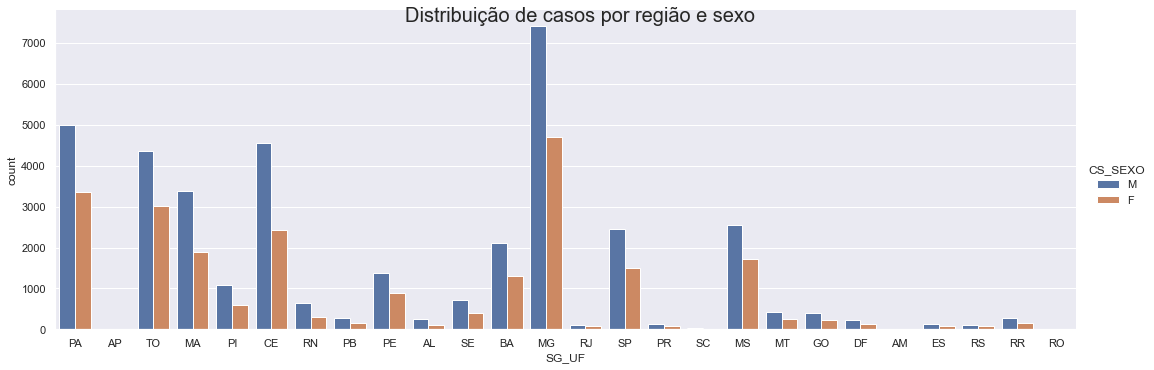

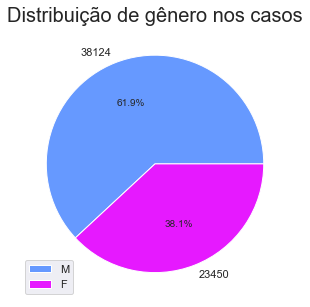

In [10]:

sns.catplot(x='SG_UF',kind='count',data=df,hue='CS_SEXO',height=5,aspect=3).fig.suptitle(
    "Distribuição de casos por região e sexo",fontsize=20)
plt.show()

#centralizando o plot
from IPython.display import display, HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

plt.figure(figsize=(5,5))
colors = plt.cm.cool(np.linspace(0.4, 0.9, len(df['CS_SEXO'].unique())))

plt.title("Distribuição de gênero nos casos",fontsize=20)
plt.pie(df['CS_SEXO'].value_counts(), labels=df['CS_SEXO'].value_counts(),autopct='%1.1f%%',colors=colors)
plt.legend(df['CS_SEXO'].unique())
plt.show()

### <center>Análise da regressão <center>
#### Análise dada na série temporal usando a ferramenta PowerBI


<img src="../assets/forecasting07-19.png" width=600 height=600 />

In [11]:
#### Algoritmo: Rob J. Hyndman - Error, Trend, Seasonality.  Additive, Additive, None

##### https://github.com/robjhyndman/forecast/tree/master/R

# série temporal a ser utilizada
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'])

time_series = pd.DataFrame(df['DT_NOTIFIC'].value_counts().reset_index())
time_series.columns = ['date', 'count']

time_series = time_series.sort_values('date', ascending=True)

### Modelo auto regressivo de previsão entre 2020 e 2025

In [12]:
# Auto regression model
from statsmodels.tsa.ar_model import AutoReg

time_series = time_series.sort_values('date', ascending=True) #ordenando pela data

time_series = time_series.set_index('date')#
time_series['date'] = time_series.index#

model = AutoReg(time_series['count'], lags=1)
model_fit = model.fit()

#train,test = time_series[1:len(time_series)-7 ], time_series[len(time_series)-7:]#70% train 30% val
# make prediction
yhat = model_fit.predict(start=13, end=18) #resultado so com dados previstos
regr = model_fit.predict(start=1, end=18) #resultado com os dados previstos e anteriores
print("Previsões de 2020 ~ 2025:")
print(yhat)


forecast = model_fit.get_prediction(len(time_series['count']), len(time_series['count'])) # so tem 1 ano aqui
print("\nMargem de confiança:")
print(forecast.conf_int()) #intervalo de confiança, ( nesse caso foi feito so do 1o ano por causa do len do forecast)



Previsões de 2020 ~ 2025:
2020-01-01    6375.137214
2021-01-01    6444.198421
2022-01-01    6502.265284
2023-01-01    6551.088070
2024-01-01    6592.138410
2025-01-01    6626.653655
Freq: AS-JAN, dtype: float64

Margem de confiança:
                  lower        upper
2020-01-01  5052.773953  7697.500475


C:\Users\the_p\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\the_p\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Users\the_p\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


C:\Users\the_p\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


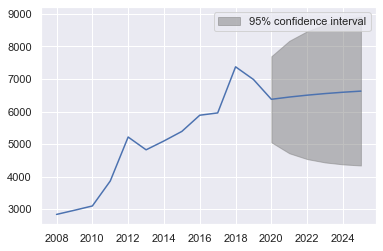

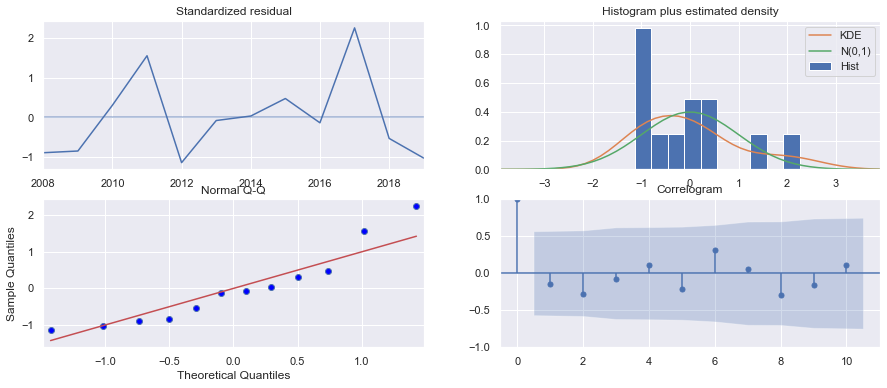

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  count   No. Observations:                   13
Model:                     AutoReg(1)   Log Likelihood                 -95.198
Method:               Conditional MLE   S.D. of innovations            674.688
Date:                Tue, 22 Jun 2021   AIC                             13.528
Time:                        00:08:03   BIC                             13.650
Sample:                    01-01-2008   HQIC                            13.484
                         - 01-01-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1083.9646    555.779      1.950      0.051      -5.343    2173.272
count.L1       0.8408      0.113      7.441      0.000       0.619       1.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1893           +0.0000j            1.1893            0.0000
-----------------------------------------------------------------------------
"""

In [13]:
model_fit.plot_predict(0,18) #plot da regressao com intervalo de confiança de 95%

model_fit.plot_diagnostics(figsize=(15,6))
plt.show()
model_fit.summary()

##### Modelos descartados... sarimax e exponential smoothing

In [14]:
'''
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(time_series['count'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit2 = model.fit(disp=False)
# make prediction
res = model_fit2.predict(len(time_series['count']), len(time_series['count']))
print(res)

plt.figure(figsize=(15,15))
model_fit2.plot_diagnostics()
plt.show()'''

'''
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit model
model = ExponentialSmoothing(time_series['count'])
model_fit2 = model.fit()
# make prediction
res = model_fit.predict(len(time_series['count']), len(time_series['count']))
print(res)

model_fit2.plot_predict()'''

"\nfrom statsmodels.tsa.holtwinters import ExponentialSmoothing\n\n# fit model\nmodel = ExponentialSmoothing(time_series['count'])\nmodel_fit2 = model.fit()\n# make prediction\nres = model_fit.predict(len(time_series['count']), len(time_series['count']))\nprint(res)\n\nmodel_fit2.plot_predict()"

### Concatenação dos dados temporais originais com os previstos no modelo auto regressivo padrão

In [15]:
#concatenando os dados previstos com os dados anteriores no dataframe 'ts'

ts = time_series.copy()

i=0
for y in yhat:
    
    row = pd.DataFrame({'date':'202'+str(i)+'-01-01','count':int(yhat['202'+str(i)+'-01-01'])},index=["2020-01-01"])#,index=["2020-01-01"])
    ts = pd.concat([row,ts],sort=False)
    i+=1
    
ts['count'] = pd.to_numeric(ts['count'])
ts['date'] = pd.to_datetime(ts['date'])

ts = ts.set_index('date')
ts = ts.sort_values('date', ascending=True)

#representacao dos anos acrescentados durante a predicao
#plt.plot(ts.index,ts['count'],color='blue')
#plt.axvspan('2020-01-01','2025-01-01',linewidth=20,facecolor='0.9')
#plt.show()

### Modelo auto regressivo em processo determinístico

C:\Users\the_p\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\the_p\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,
C:\Users\the_p\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


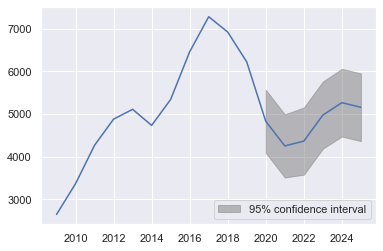

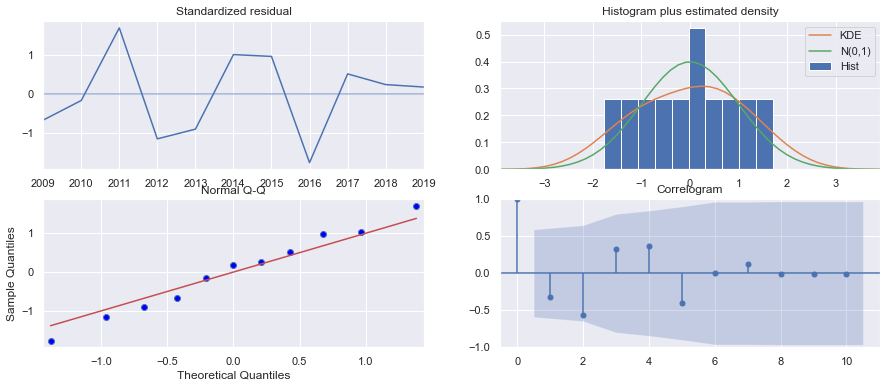

                            AutoReg Model Results                             
Dep. Variable:                  count   No. Observations:                   13
Model:                     AutoReg(2)   Log Likelihood                 -80.875
Method:               Conditional MLE   S.D. of innovations            377.397
Date:                Tue, 22 Jun 2021   AIC                             13.321
Time:                        00:08:05   BIC                             13.611
Sample:                    01-01-2009   HQIC                            13.139
                         - 01-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3346.4645   1394.224      2.400      0.016     613.835    6079.094
sin(1,12)   -971.5503    484.961     -2.003      0.045   -1922.056     -21.045
cos(1,12)     50.4906    293.238      0.172      0.8

In [16]:
from statsmodels.tsa.deterministic import DeterministicProcess

dpts = time_series.copy()
dpts = dpts.set_index('date')

dp = DeterministicProcess(dpts.index, constant=True, period=12, fourier=2)
mod = AutoReg(dpts['count'],2, trend="n",seasonal=False, deterministic=dp)
res = mod.fit()
#print(res.summary())

regr_dp = res.predict(start=1, end=18) #resultado com os dados previstos e anteriores
#print("Previsões de 2020 ~ 2025:")
#print(regr_dp)

res.plot_predict(0,18)
res.plot_diagnostics(figsize=(15,6))
plt.show()
print(res.summary())

regr_dp = pd.DataFrame(regr_dp)
regr_dp['date'] = ts.index[1:]
regr_dp = regr_dp.set_index('date')

regr_dp = regr_dp.rename(columns={0:'DetProcess'})

#### Compilado comportamental entre os modelos e a série original

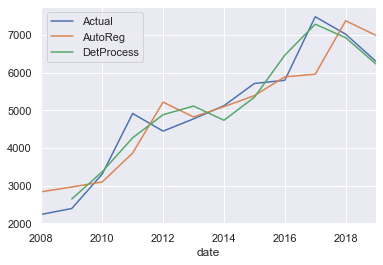

In [17]:
#comparativo entre a serie temporal original e o modelo preditivo treinado

regr.shape #conferindo os tamanhos do regr e o ts deslocado em 1...
ts[1:].shape #... pois a regressao vai ter 1 ano a menos dado que ela so preve

regr = pd.DataFrame(regr)

regr['date'] = ts.index[1:]
regr = regr.set_index('date')


compare_df = pd.concat([ts['count'].tail(18),regr,regr_dp],axis=1).rename( columns={'count':'Actual',0:'AutoReg'})


compare_df[:12].plot()

plt.show()

## Registro final dos 2 modelos regressivos nos anos propostos

C:\Users\the_p\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


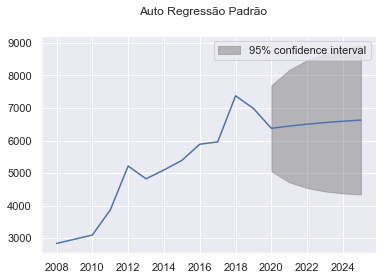

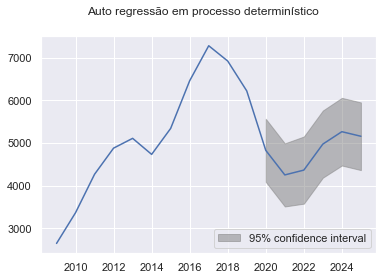

In [18]:
fig1 = model_fit.plot_predict(0,18)
fig1.suptitle("Auto Regressão Padrão")

fig2 = res.plot_predict(0,18)
fig2.suptitle("Auto regressão em processo determinístico")
plt.show()